**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
weka2c = pd.read_csv('2ClassData.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
weka2c.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
weka2c.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
weka2c['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [6]:
weka2c.describe(include='all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [7]:
weka2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
# As per the above EDA, we can see that there are total 310 rows in the given dataset & none of the FEATURES have NULL or 
# MISSING VALUES. The target variable CLASS has 2 values ABNORMAL & NORMAL & it too doesn't have any NULL values.
# All the FEATURES have FLOAT type of data, while the LABEL has OBJECT data. We will need to undertake ENCODING for the same to
# fit into our KNN Classification model.

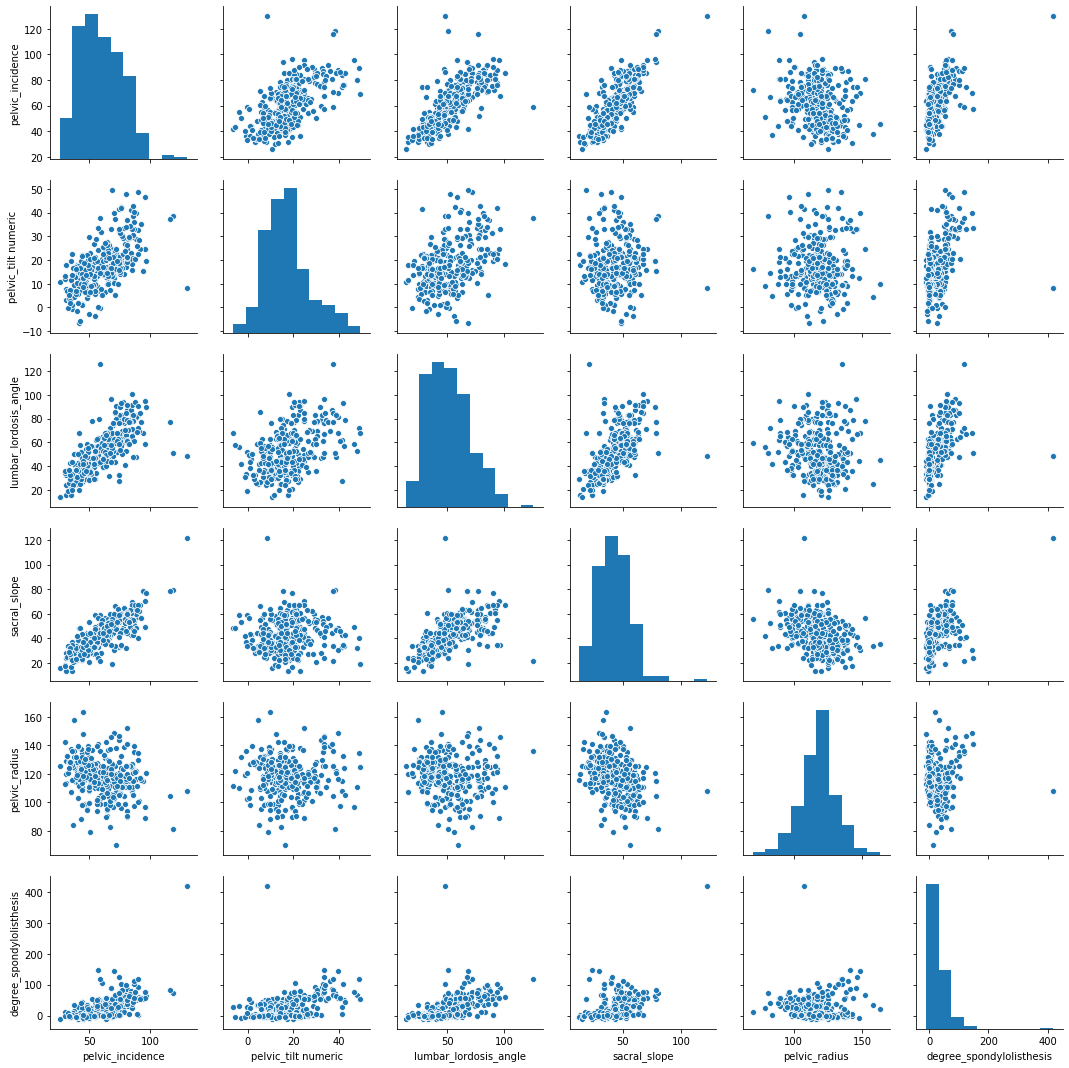

In [9]:
sns.pairplot(weka2c)

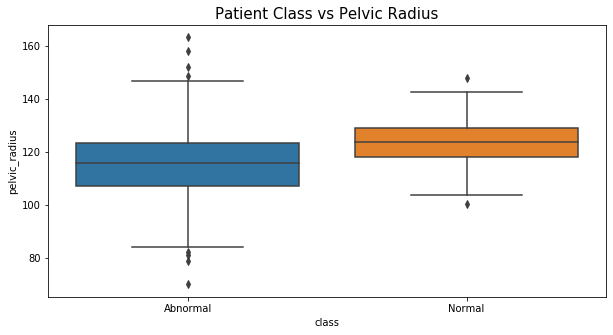

In [10]:
plt.figure(figsize=(10,5))
plt.title('Patient Class vs Pelvic Radius', fontsize = 15)
sns.boxplot(x="class",y="pelvic_radius",data=weka2c)

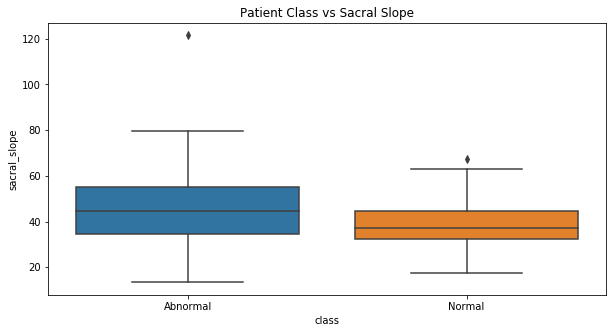

In [11]:
plt.figure(figsize=(10,5))
plt.title('Patient Class vs Sacral Slope')
sns.boxplot(x="class",y="sacral_slope",data=weka2c)

# Encode the Class variable to integer.

In [12]:
weka2c.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Abnormal","Normal"])
Y1 = le.fit_transform(weka2c['class'])

In [14]:
print ("The encoded values of weka2c['class'] is stored in the target variable Y")
print ("The encoded values of weka2c['class'] is shown below")
print (Y1)

The encoded values of weka2c['class'] is stored in the target variable Y
The encoded values of weka2c['class'] is shown below
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [15]:
feature_weka2c=weka2c.drop(columns='class')

In [16]:
feature_weka2c.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# Normalize your Data (X) to get values between 0 to 1.

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X1=min_max_scaler.fit_transform(feature_weka2c)

# Split the dat as train and test with a ratio of 70:30.

In [18]:
from sklearn.model_selection import train_test_split
X1_train,x1_test,Y1_train,y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=1)

In [19]:
print ('Shape of Training Features is: ',X1_train.shape)
print ('Shape of Training Labels is: ',Y1_train.shape)
print ('Shape of Testing Features is: ',x1_test.shape)
print ('Shape of Testing Labels is: ',y1_test.shape)

Shape of Training Features is:  (217, 6)
Shape of Training Labels is:  (217,)
Shape of Testing Features is:  (93, 6)
Shape of Testing Labels is:  (93,)


In [20]:
#So the Training & Testing Data is split into 2 datasets having 217 & 93 rows each, from 310 rows in total,
#which is a 70:30 split

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [21]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')
KNN.fit(X1_train,Y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
le.inverse_transform(KNN.predict(x1_test))

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Normal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [23]:
y_train_pred1 = KNN.predict(X1_train)
y_test_pred1 = KNN.predict(x1_test)

from sklearn.metrics import accuracy_score
print ('The accuracy score of our KNN Classifier Model, for k=5 & training data, is %.2f'%(accuracy_score(Y1_train,y_train_pred1)*100)+'%')
print ('The accuracy score of our KNN Classifier Model, for k=5 & test data, is %.2f'%(accuracy_score(y1_test,y_test_pred1)*100)+'%')

The accuracy score of our KNN Classifier Model, for k=5 & training data, is 85.71%
The accuracy score of our KNN Classifier Model, for k=5 & test data, is 74.19%


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [24]:
from sklearn.metrics import accuracy_score
k1,max1=0,0
accuracy_test1 = []
for i in range(1,21):
    knn1 = KNeighborsClassifier(n_neighbors=i,weights='uniform',metric='euclidean')
    knn1.fit(X1_train,Y1_train)
    ytest_pred1 = knn1.predict(x1_test)
    accuracy_test1.append((accuracy_score(y1_test,ytest_pred1)*100))
    if accuracy_score(y1_test,ytest_pred1) > max1:
        max1 = accuracy_score(y1_test,ytest_pred1)
        k1=i
        
print ('The max. accuracy score is :%.2f'%max1+' for Test Data, and its for neighbors= %d'%k1)

The max. accuracy score is :0.81 for Test Data, and its for neighbors= 19


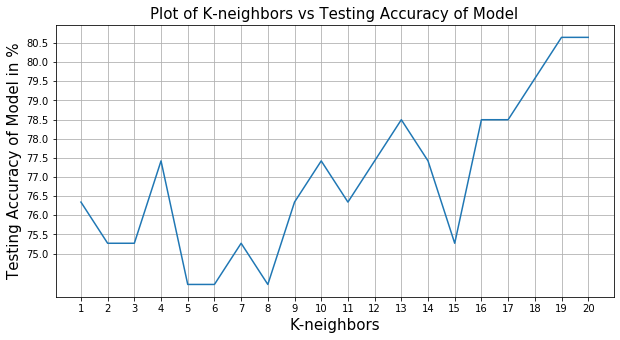

In [25]:
plt.figure(figsize=(10,5))
plt.title('Plot of K-neighbors vs Testing Accuracy of Model',fontsize=15)
plt.xlabel('K-neighbors',fontsize=15)
plt.ylabel('Testing Accuracy of Model in %',fontsize=15)
plt.grid(True)
plt.xticks(np.arange(1,21))
plt.yticks(np.arange(75,85,0.5))
plt.plot(np.arange(1,21),accuracy_test1)

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [26]:
weka3c = pd.read_csv('3ClassData.csv')

In [27]:
weka3c.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [28]:
weka3c.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [29]:
weka3c.describe(include='all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [30]:
weka3c['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [31]:
weka3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [32]:
print ('pelvic_incidence is NAN',weka3c['pelvic_incidence'].isna().value_counts())
print ('pelvic_tilt is NAN',weka3c['pelvic_tilt'].isna().value_counts())
print ('lumbar_lordosis_angle is NAN',weka3c['lumbar_lordosis_angle'].isna().value_counts())
print ('sacral_slope is NAN',weka3c['sacral_slope'].isna().value_counts())
print ('pelvic_radius is NAN',weka3c['pelvic_radius'].isna().value_counts())
print ('degree_spondylolisthesis is NAN',weka3c['degree_spondylolisthesis'].isna().value_counts())
print ('class is NAN',weka3c['class'].isna().value_counts())

pelvic_incidence is NAN False    310
Name: pelvic_incidence, dtype: int64
pelvic_tilt is NAN False    310
Name: pelvic_tilt, dtype: int64
lumbar_lordosis_angle is NAN False    310
Name: lumbar_lordosis_angle, dtype: int64
sacral_slope is NAN False    310
Name: sacral_slope, dtype: int64
pelvic_radius is NAN False    310
Name: pelvic_radius, dtype: int64
degree_spondylolisthesis is NAN False    310
Name: degree_spondylolisthesis, dtype: int64
class is NAN False    310
Name: class, dtype: int64


In [33]:
#Thus none of the variables have NaN values

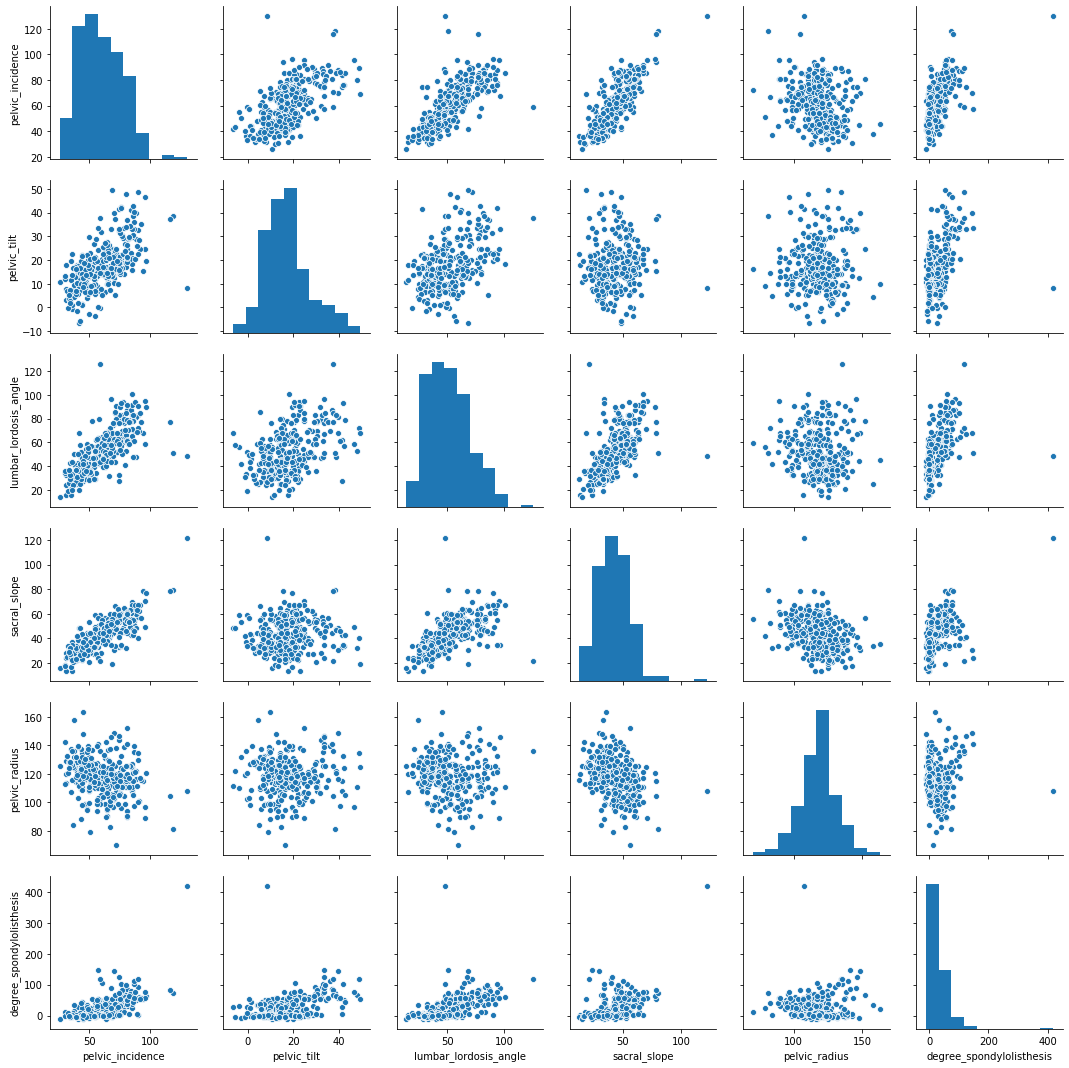

In [34]:
sns.pairplot(weka3c)

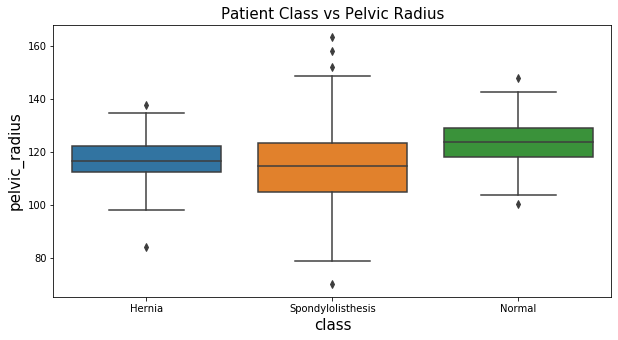

In [35]:
plt.figure(figsize=(10,5))
plt.title('Patient Class vs Pelvic Radius',fontsize=15)
plt.xlabel('Patient Class',fontsize=15)
plt.ylabel('Pelvic Radius',fontsize=15)
sns.boxplot(x='class',y='pelvic_radius',data=weka3c)

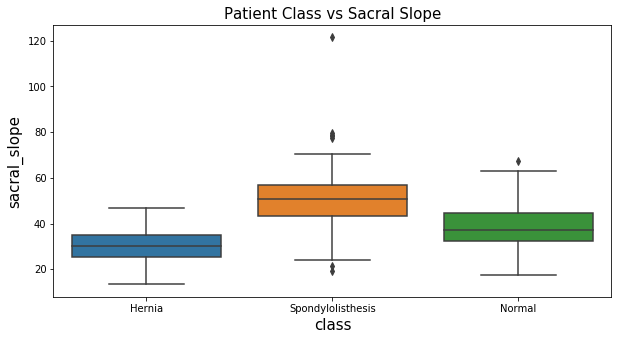

In [36]:
plt.figure(figsize=(10,5))
plt.title('Patient Class vs Sacral Slope',fontsize=15)
plt.xlabel('Patient Class',fontsize=15)
plt.ylabel('Sacral Slope',fontsize=15)
sns.boxplot(x='class',y='sacral_slope',data=weka3c)

In [37]:
weka3c.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [38]:
le.fit(["Spondylolisthesis","Normal","Hernia"])
Y2=le.fit_transform(weka3c['class'])
print ("The encoded values of weka3c['class'] is stored in the target variable Y")
print ("The encoded values of weka3c['class'] is shown below")
print (Y2)

The encoded values of weka3c['class'] is stored in the target variable Y
The encoded values of weka3c['class'] is shown below
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [39]:
feature_weka3c=weka3c.drop(columns='class')
feature_weka3c.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X2=min_max_scaler.fit_transform(feature_weka3c)

In [41]:
from sklearn.model_selection import train_test_split
X2_train,x2_test,Y2_train,y2_test = train_test_split(X2,Y2,test_size=0.3,random_state=1)
print ('Shape of Training Features is: ',X2_train.shape)
print ('Shape of Training Labels is: ',Y2_train.shape)
print ('Shape of Testing Features is: ',x2_test.shape)
print ('Shape of Testing Labels is: ',y2_test.shape)

Shape of Training Features is:  (217, 6)
Shape of Training Labels is:  (217,)
Shape of Testing Features is:  (93, 6)
Shape of Testing Labels is:  (93,)


In [42]:
#So the Training & Testing Data is split into 2 datasets having 217 & 93 rows each, from 310 rows in total,
#which is a 70:30 split

In [43]:
KNN2 = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')
KNN2.fit(X2_train,Y2_train)
le.inverse_transform(KNN2.predict(x2_test))

array(['Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Hernia', 'Normal', 'Hernia', 'Normal',
       'Normal', 'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Hernia', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal', 'Hernia',
       'Spondylolisthesis', 'Hernia', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Normal', 'Hernia',
       'Spondylolisthesis', 'Normal', 'Hernia', 'Normal', 'Hernia',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Hernia', 'Sp

In [44]:
y_train_pred2=KNN2.predict(X2_train)
y_test_pred2=KNN2.predict(x2_test)

from sklearn.metrics import accuracy_score
print ('The accuracy score of our KNN Classifier Model, for k=5 & training data, is %.2f'%(accuracy_score(Y2_train,y_train_pred2)*100)+'%')
print ('The accuracy score of our KNN Classifier Model, for k=5 & test data, is %.2f'%(accuracy_score(y2_test,y_test_pred2)*100)+'%')

The accuracy score of our KNN Classifier Model, for k=5 & training data, is 83.41%
The accuracy score of our KNN Classifier Model, for k=5 & test data, is 69.89%


In [45]:
from sklearn.metrics import accuracy_score
k2,max2=0,0
accuracy_test2=[]
for i in range(1,21):
    knn2=KNeighborsClassifier(n_neighbors=i,weights='uniform',metric='euclidean')
    knn2.fit(X2_train,Y2_train)
    ytest_pred2 = knn2.predict(x2_test)
    accuracy_test2.append(accuracy_score(y2_test,ytest_pred2)*100)
    if accuracy_score(y2_test,ytest_pred2) > max2:
        max2=accuracy_score(y2_test,ytest_pred2)
        k2=i
print ('The max. accuracy score, for Testing Data, is :%.2f'%max2+', and its for neighbors= %d'%k2)

The max. accuracy score, for Testing Data, is :0.76, and its for neighbors= 12


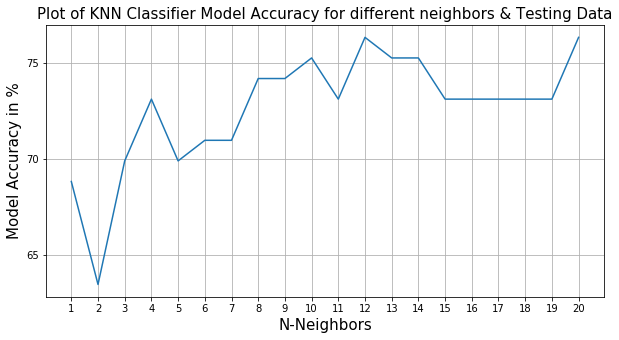

In [46]:
plt.figure(figsize=(10,5))
plt.title('Plot of KNN Classifier Model Accuracy for different neighbors & Testing Data', fontsize=15)
plt.xlabel('N-Neighbors',fontsize=15)
plt.ylabel('Model Accuracy in %',fontsize=15)
plt.grid(True)
plt.xticks(np.arange(1,21))
plt.yticks(np.arange(50,90,5))
plt.plot(np.arange(1,21),accuracy_test2)